In [4]:
from model import network_mnist,naive_train,test_taskwise,test,benchmark,train_stream,test_stream,compute_fisher_information,apply_importance_mask
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from plot import (
    plot_parameter_importance,
    
)

import os


In [5]:

model=network_mnist(256,128)
model_2=network_mnist(256,128)
#print(model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model_2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs=5





Training on Task 0
Post-training accuracy on Task 0: 99.91%
✓ Figure saved: figures/task_0_importance.pdf


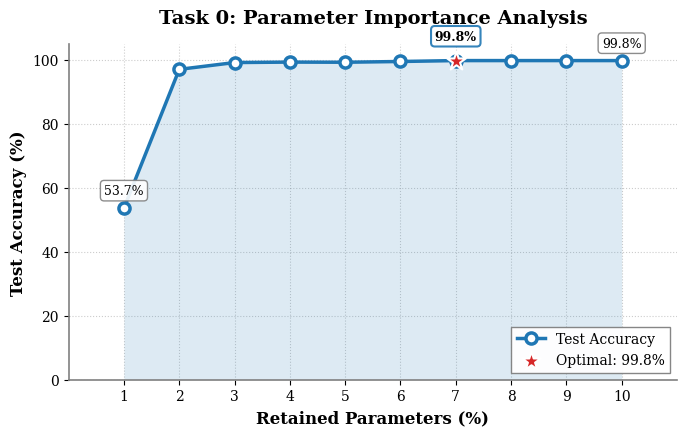


Training on Task 1
Post-training accuracy on Task 1: 99.61%
✓ Figure saved: figures/task_1_importance.pdf


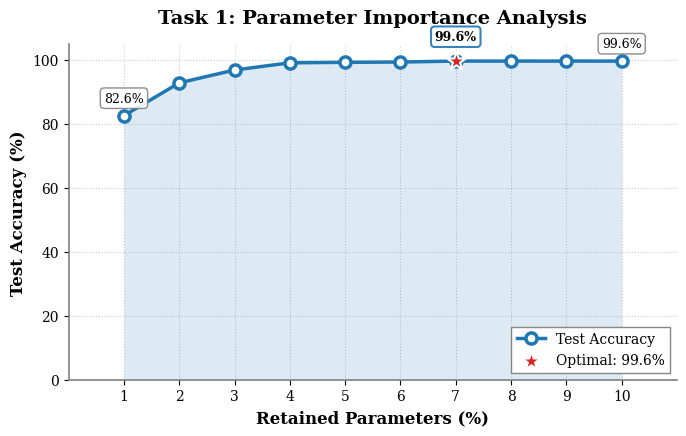


Training on Task 2
Post-training accuracy on Task 2: 99.79%
✓ Figure saved: figures/task_2_importance.pdf


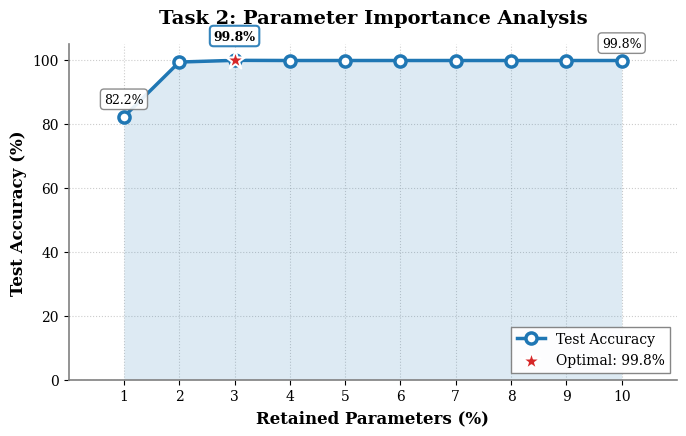


Training on Task 3
Post-training accuracy on Task 3: 99.85%
✓ Figure saved: figures/task_3_importance.pdf


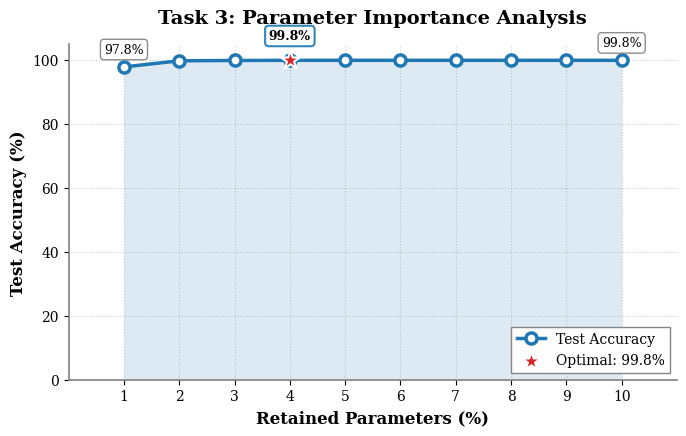


Training on Task 4
Post-training accuracy on Task 4: 98.74%
✓ Figure saved: figures/task_4_importance.pdf


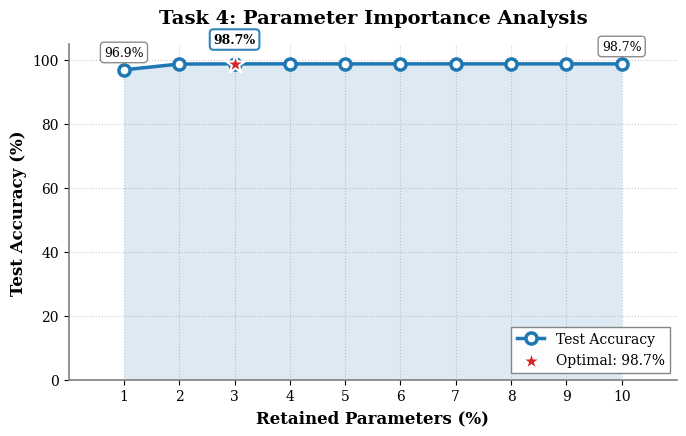

In [6]:
os.makedirs('figures', exist_ok=True)
all_tasks_data = {}

for task in range(5):
    print(f"\n{'='*70}")
    print(f"Training on Task {task}")
    print(f"{'='*70}")

    naive_train(model, task, epochs, criterion=criterion, optimizer=optimizer, device=device)
    acc = test_taskwise(model, task, device)
    print(f"Post-training accuracy on Task {task}: {acc:.2f}%")

    fisher_dict = compute_fisher_information(model, task_number=task, num_samples=300, 
                                             criterion=criterion, device=device)
    percent_list = list(range(1, 11))
    accuracy_vs_percent = []

    original_weights = {name: param.clone() for name, param in model.state_dict().items()}
    for p in percent_list:
        model, mask_dict = apply_importance_mask(model, fisher_dict, importance_percent=p)
        acc_p = test_taskwise(model, task, device)
        accuracy_vs_percent.append(acc_p)
        model.load_state_dict(original_weights, strict=False)
       
    all_tasks_data[task] = (percent_list, accuracy_vs_percent)
    plot_parameter_importance(
        percent_list=percent_list,
        accuracy_list=accuracy_vs_percent,
        task_id=task,
        save_path=f'figures/task_{task}_importance.pdf',
        show_plot=True  # Set to False to not display during training
    )


In [ ]:
acc_lists=[]
for task in range(0,5):
    print(f"Training on task {task}...")
    naive_train(model,task, epochs,criterion=criterion,optimizer=optimizer,device=device)
    print(f"Testing on task {task}...")
    #test_taskwise(model,task,device)
    acc,acc_list=test(model,device)
    acc_lists.append(acc_list)
fisher_dict=compute_fisher_information(model,4,300,criterion,device)
print(fisher_dict)
acc,acc_list=test(model,device)
model,mask=apply_importance_mask(model,fisher_dict,3)

print(mask)
acc1,acc_list1=test(model,device)
print("Accuracy before applying mask:",acc_list)
print("Accuracy after applying mask:",acc_list1) 

Training on task 4...
Testing on task 4...
Accuracy on task 0: 0.00%
Accuracy on task 1: 0.00%
Accuracy on task 2: 0.00%
Accuracy on task 3: 0.00%
Accuracy on task 4: 99.34%
Average Accuracy: 19.87%



===== Training on Task 0 =====
Accuracy on task 0: 99.95%
Accuracy on task 0: 99.01%
Accuracy on task 0: 99.72%
Accuracy on task 0: 99.81%
Accuracy on task 0: 99.86%
Accuracy on task 0: 99.91%
Accuracy on task 0: 99.91%
Accuracy on task 0: 99.95%
Accuracy on task 0: 99.95%
Accuracy on task 0: 99.95%
Accuracy on task 0: 99.91%


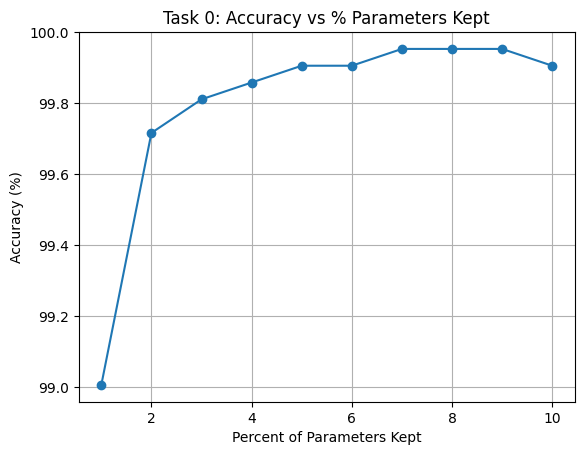


===== Training on Task 1 =====
Accuracy on task 1: 99.22%
Accuracy on task 1: 79.58%
Accuracy on task 1: 85.36%
Accuracy on task 1: 95.40%
Accuracy on task 1: 96.03%
Accuracy on task 1: 97.06%
Accuracy on task 1: 97.80%
Accuracy on task 1: 99.02%
Accuracy on task 1: 99.07%
Accuracy on task 1: 99.07%
Accuracy on task 1: 98.82%


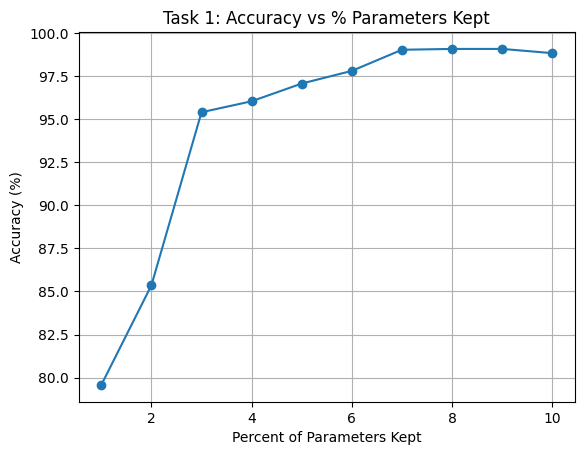


===== Training on Task 2 =====
Accuracy on task 2: 99.68%
Accuracy on task 2: 97.81%
Accuracy on task 2: 97.76%
Accuracy on task 2: 99.09%
Accuracy on task 2: 99.41%
Accuracy on task 2: 99.52%
Accuracy on task 2: 99.68%
Accuracy on task 2: 99.68%
Accuracy on task 2: 99.63%
Accuracy on task 2: 99.68%
Accuracy on task 2: 99.63%


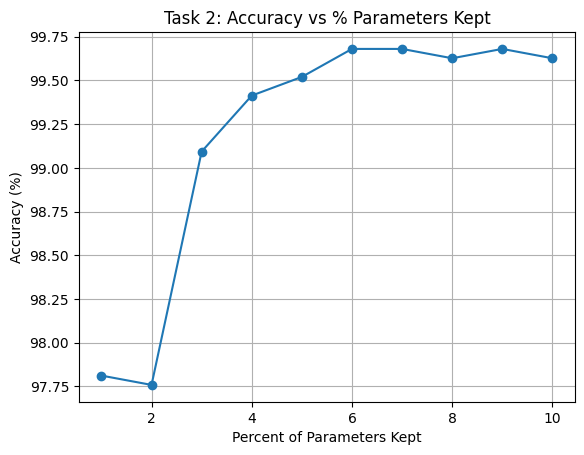


===== Training on Task 3 =====
Accuracy on task 3: 99.80%
Accuracy on task 3: 88.22%
Accuracy on task 3: 94.71%
Accuracy on task 3: 97.58%
Accuracy on task 3: 98.19%
Accuracy on task 3: 99.14%
Accuracy on task 3: 99.30%
Accuracy on task 3: 99.90%
Accuracy on task 3: 99.75%
Accuracy on task 3: 99.70%
Accuracy on task 3: 99.70%


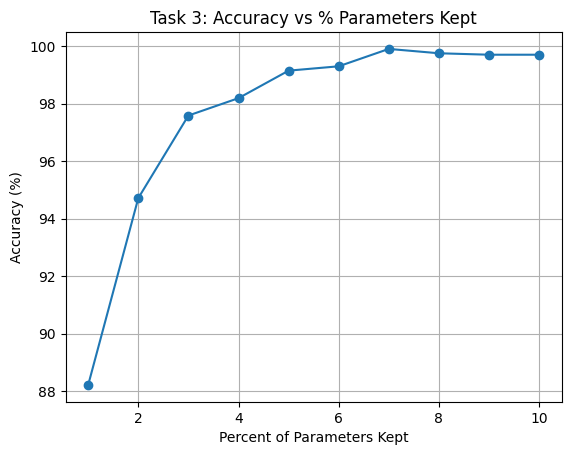


===== Training on Task 4 =====
Accuracy on task 4: 99.04%
Accuracy on task 4: 80.08%
Accuracy on task 4: 97.13%
Accuracy on task 4: 95.56%
Accuracy on task 4: 98.23%
Accuracy on task 4: 98.29%
Accuracy on task 4: 99.19%
Accuracy on task 4: 99.19%
Accuracy on task 4: 99.19%
Accuracy on task 4: 99.24%
Accuracy on task 4: 99.09%


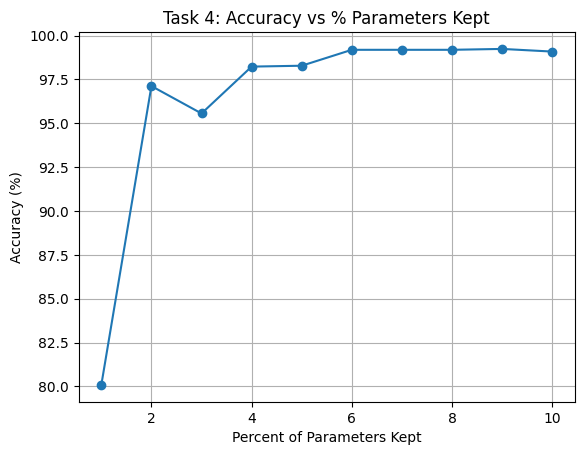


Training completed for all tasks.


In [ ]:


# Train and evaluate sequentially
for task in range(5):
    print(f"\n===== Training on Task {task} =====")
    naive_train(model, task, epochs, criterion=criterion, optimizer=optimizer, device=device)
    acc=test_taskwise(model, task, device)   
    fisher_dict = compute_fisher_information(model, task_number=task, num_samples=300, criterion=criterion, device=device)
    percent_list = list(range(1, 11))
    accuracy_vs_percent = []
    original_weights = {name: param.clone() for name, param in model.state_dict().items()}
    for p in percent_list:
        model, mask_dict = apply_importance_mask(model, fisher_dict, importance_percent=p)
        acc_p=test_taskwise(model, task, device)
        accuracy_vs_percent.append(acc_p)

        model.load_state_dict(original_weights, strict=False)

    plt.figure()
    plt.plot(percent_list, accuracy_vs_percent, marker='o')
    plt.title(f"Task {task}: Accuracy vs % Parameters Kept")
    plt.xlabel("Percent of Parameters Kept")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.show()

print("\nTraining completed for all tasks.")
